In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import os

In [4]:
ABS_PATH = os.path.abspath("")
IMG_PATH = os.path.join(ABS_PATH, "images")

frames = {}
img_names = []
for root, dirs, fnames in os.walk(IMG_PATH):
    fnames = [fname for fname in fnames if fname.lower().endswith(".jpg") or fname.lower().endswith(".png")]
    for fname in fnames:
        frames[fname] = plt.imread(os.path.join(root, fname))
    img_names += fnames

In [5]:
freq = np.fft.fft2(frames[img_names[0]])
freq = np.abs(freq)

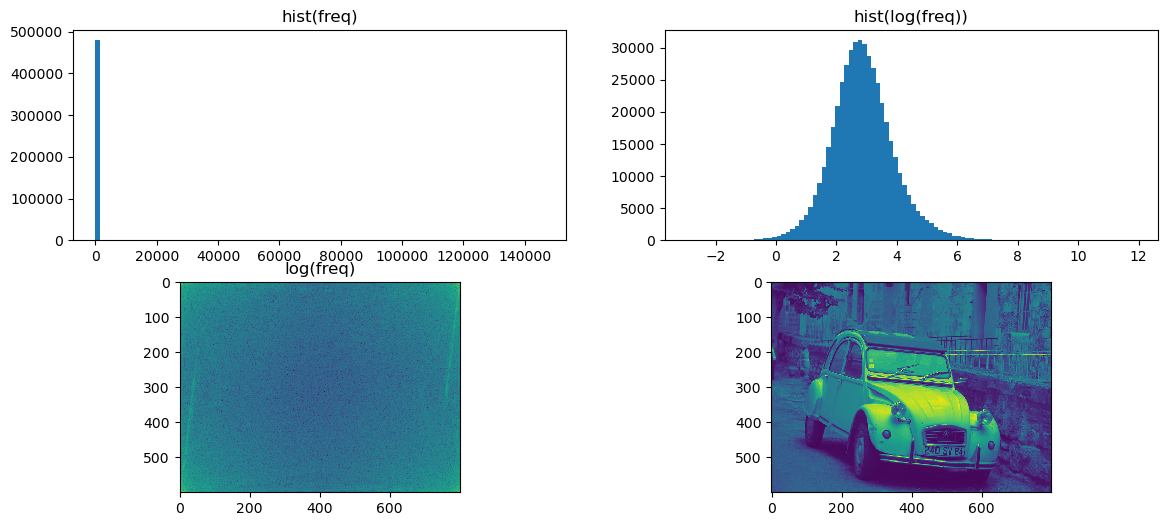

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
ax[0,0].hist(freq.ravel(), bins=100)
ax[0,0].set_title('hist(freq)')
ax[0,1].hist(np.log(freq).ravel(), bins=100)
ax[0,1].set_title('hist(log(freq))')
ax[1,0].imshow(np.log(freq), interpolation="none")
ax[1,0].set_title('log(freq)')
ax[1,1].imshow(frames[img_names[0]], interpolation="none")

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

In [180]:
import timeit


def fourier1d1(frame):
    out = []
    M = frame.shape[0]
    for u in np.arange(M):
        res = (frame * np.exp(-(2*np.pi*1j*u/M)*np.arange(M))).sum()
        out.append(res)
    return np.array(out)


def fourier1d2(frame):   
    exponent = -2 * np.pi * 1j * np.arange(frame.shape[0])/frame.shape[0] 
    exponent = exponent[:, None] * np.arange(frame.shape[0])
    res = frame * np.exp(exponent)
    sum = res.sum(axis=-1)
    return sum


def fourier1d3(frame):   
    return frame*np.exp((-2 * np.pi * 1j * np.arange(frame.shape[0])/frame.shape[0])[:, None] * np.arange(frame.shape[0])).sum(axis=-1)


res1 = fourier1d1(np.sin(np.arange(50)))
res2 = fourier1d2(np.sin(np.arange(50)))
res2 = fourier1d3(np.sin(np.arange(50)))
res3 = np.fft.fft(np.sin(np.arange(50)))



execution_time1 = timeit.timeit('fourier1d1(np.sin(np.arange(250)))', globals=globals(), number=1000)
execution_time2 = timeit.timeit('fourier1d2(np.sin(np.arange(250)))', globals=globals(), number=1000)
execution_time3 = timeit.timeit('fourier1d3(np.sin(np.arange(250)))', globals=globals(), number=1000)
execution_time4 = timeit.timeit('np.fft.fft(np.sin(np.arange(250)))', globals=globals(), number=1000)


print(execution_time1)
print(execution_time2)
print(execution_time3)
print(execution_time4)


# fig = plt.figure(figsize=(15,5))
# plt.plot(res1)
# plt.plot(res2)
# plt.plot(res3)

8.097308299969882
4.999605699966196
4.95519670000067
0.01381299999775365


In [130]:
frame = frames[img_names[0]]



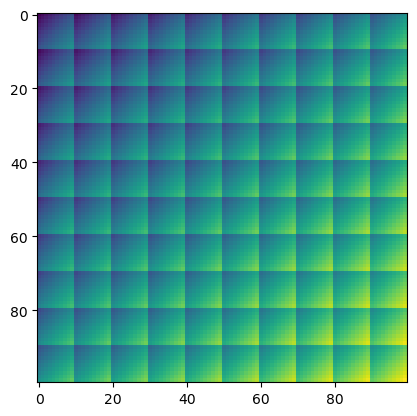

In [131]:
a = np.arange(10)[:, None] + np.arange(10)
x,y = np.meshgrid(a,a)
plt.imshow(x+y)

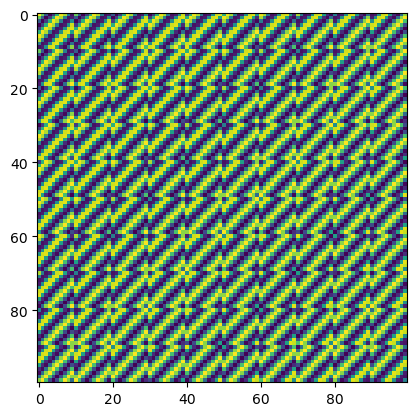

In [132]:
a = np.arange(10)[:, None] + np.arange(10)
x,y = np.meshgrid(a,a)
a = x + y 
a = np.cos(a) + 1j * np.sin(a)
plt.imshow(a.real)

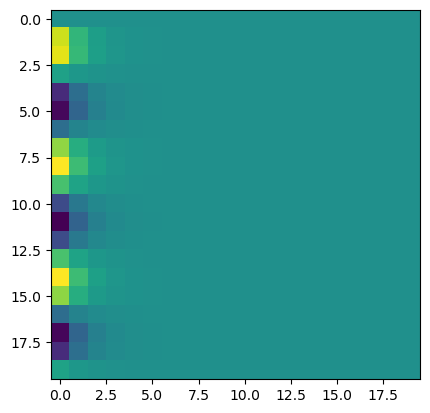

In [185]:
a = np.arange(20)[:, None] + 1j * np.arange(20)
a = np.cos(a) + 1j * np.sin(a)
plt.imshow(a.imag)

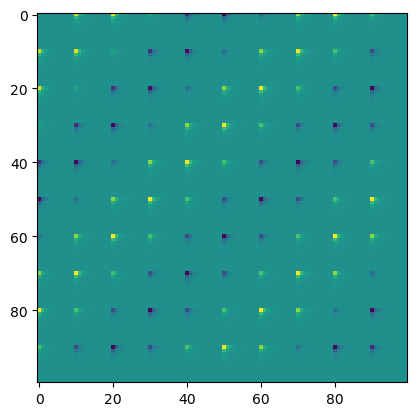

In [182]:
a = np.arange(10)[:, None] + 1j * np.arange(10)
x,y = np.meshgrid(a,a)
a = x+y
a = np.cos(a) + 1j * np.sin(a)
plt.imshow(a.imag)

$\displaystyle w_x=\mathrm{e}^{ix}=\cos{x}+\sin{ix}$

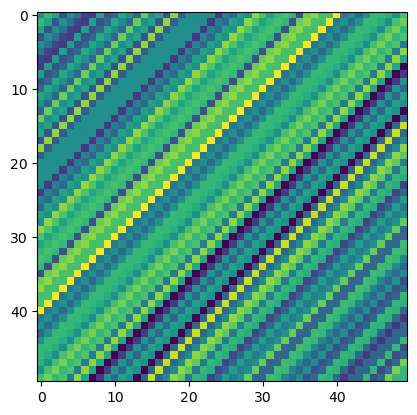

In [179]:
a = np.arange(50)[:,None] + np.arange(50)
a = np.exp(1j* a)


a = np.log(a)
plt.imshow(a.real)

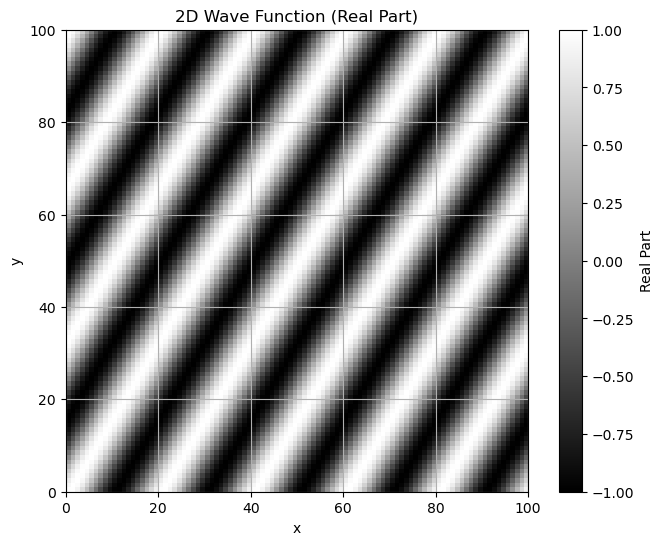

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define dimensions of the image
M, N = 100, 100  # Dimensions of the image

# Step 2: Create meshgrid for x and y coordinates
x = np.arange(M)
y = np.arange(N)
x, y = np.meshgrid(x, y)

# Step 3: Define frequencies (u, v)
u = 5  # Horizontal frequency
v = 3  # Vertical frequency

# Step 4: Compute the wave function
wave = np.exp(1j * 2 * np.pi * (u * x / M + v * y / N))

# Step 5: Visualize the real part of the wave
plt.figure(figsize=(8, 6))
plt.imshow(np.real(wave), cmap='gray', extent=(0, N, 0, M))
plt.colorbar(label='Real Part')
plt.title('2D Wave Function (Real Part)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
